In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anthem-txt/fk.txt
/kaggle/input/anthem-txt/az.txt
/kaggle/input/anthem-txt/mc.txt
/kaggle/input/anthem-txt/eu.txt
/kaggle/input/anthem-txt/fj.txt
/kaggle/input/anthem-txt/eh.txt
/kaggle/input/anthem-txt/bd.txt
/kaggle/input/anthem-txt/ae.txt
/kaggle/input/anthem-txt/id.txt
/kaggle/input/anthem-txt/al.txt
/kaggle/input/anthem-txt/ao.txt
/kaggle/input/anthem-txt/fm.txt
/kaggle/input/anthem-txt/ga.txt
/kaggle/input/anthem-txt/ir.txt
/kaggle/input/anthem-txt/kr.txt
/kaggle/input/anthem-txt/bg.txt
/kaggle/input/anthem-txt/bi.txt
/kaggle/input/anthem-txt/de.txt
/kaggle/input/anthem-txt/ki.txt
/kaggle/input/anthem-txt/jo.txt
/kaggle/input/anthem-txt/dz.txt
/kaggle/input/anthem-txt/bb.txt
/kaggle/input/anthem-txt/md.txt
/kaggle/input/anthem-txt/ax.txt
/kaggle/input/anthem-txt/ar.txt
/kaggle/input/anthem-txt/et.txt
/kaggle/input/anthem-txt/cf.txt
/kaggle/input/anthem-txt/ec.txt
/kaggle/input/anthem-txt/ma.txt
/kaggle/input/anthem-txt/au.txt
/kaggle/input/anthem-txt/gq.txt
/kaggle/

In [59]:
import os
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [60]:

# Download stopwords if not available
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:

# Function to read all anthem files from a folder
def load_anthems_from_folder(folder_path):
    anthem_texts = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith(".txt"):  # Process only .txt files
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read().strip()
                    if text and text != "NA":  # Ignore empty files and NA
                        anthem_texts.append(text)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    return anthem_texts

# Pre-processing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words and len(word) > 2]  # Remove stopwords & short words
    return " ".join(words)

# Set the correct folder path
anthem_folder = "/kaggle/input/anthem-txt"  # Change this to your actual folder path

# Load and preprocess anthems
anthems = load_anthems_from_folder(anthem_folder)
preprocessed_anthems = [preprocess_text(anthem) for anthem in anthems]

# Combine all anthems for overall analysis
full_text = " ".join(preprocessed_anthems)


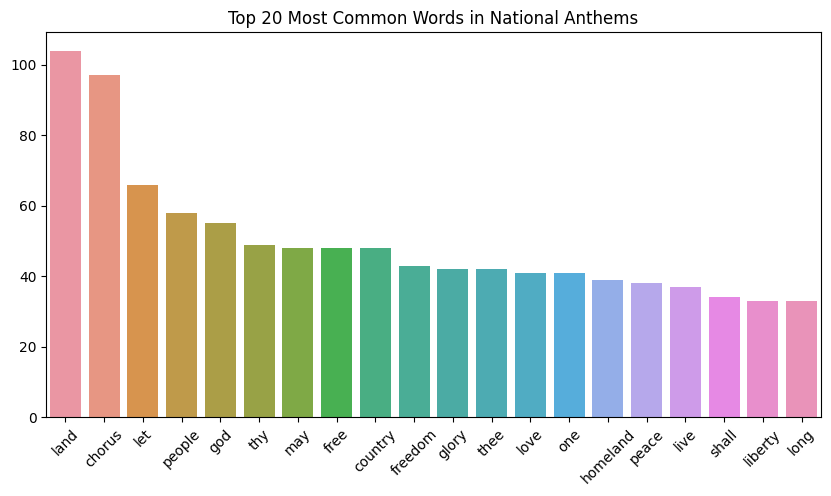

In [62]:

### 1. WORD FREQUENCY ANALYSIS ###
word_counts = Counter(full_text.split())
common_words = word_counts.most_common(20)

# Plot top 20 words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in National Anthems")
plt.show()


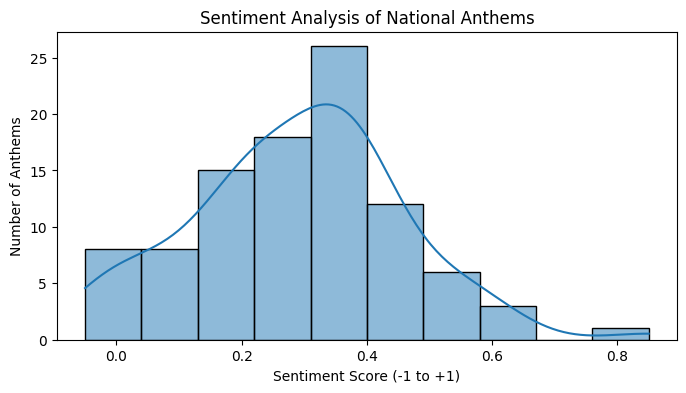

In [63]:

### 2. SENTIMENT ANALYSIS ###
sentiments = [TextBlob(anthem).sentiment.polarity for anthem in preprocessed_anthems]
plt.figure(figsize=(8, 4))
sns.histplot(sentiments, bins=10, kde=True)
plt.title("Sentiment Analysis of National Anthems")
plt.xlabel("Sentiment Score (-1 to +1)")
plt.ylabel("Number of Anthems")
plt.show()

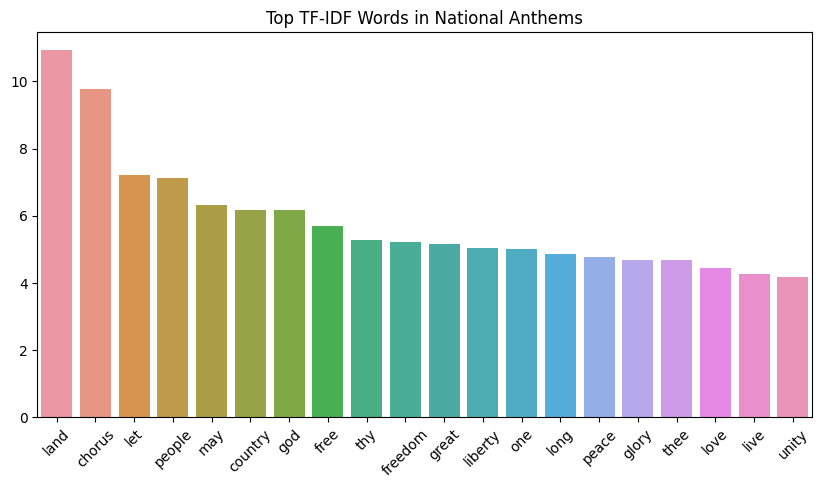

In [64]:

### 3. TF-IDF THEMATIC ANALYSIS ###
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(preprocessed_anthems)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Show top TF-IDF words
tfidf_sums = tfidf_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.xticks(rotation=45)
plt.title("Top TF-IDF Words in National Anthems")
plt.show()

In [65]:


### 4. TOPIC MODELING (LDA) using Scikit-Learn ###
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
count_matrix = count_vectorizer.fit_transform(preprocessed_anthems)

# Train LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_matrix)

# Print top words per topic
def print_top_words(model, feature_names, n_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")

print("\n### TOPICS IN NATIONAL ANTHEMS ###")
print_top_words(lda, count_vectorizer.get_feature_names_out())



### TOPICS IN NATIONAL ANTHEMS ###
Topic 1: chorus shall land thy sons
Topic 2: god years thy thousand let
Topic 3: land freedom free country live
Topic 4: let people chorus love free
Topic 5: land chorus homeland people country


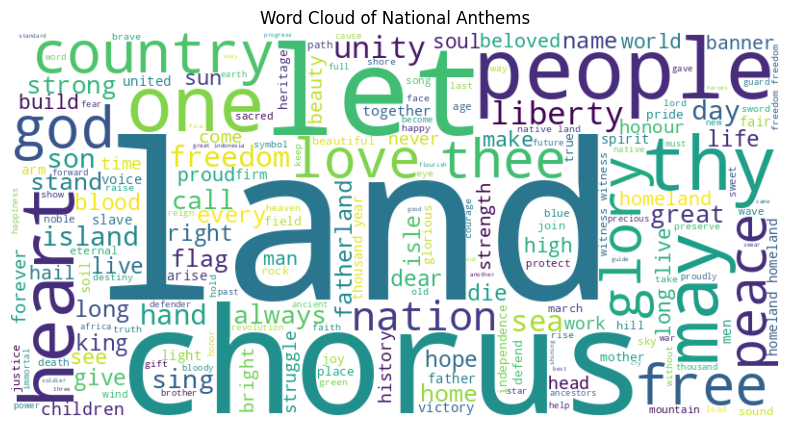

In [66]:



### 5. WORD CLOUD ###
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of National Anthems")
plt.show()
